<a href="https://colab.research.google.com/github/Degananda264/Automated-Machine-Learning-/blob/master/Using_AutoSklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 43 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 0s (5,425 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fron

In [0]:
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [0]:
BASE_DIR = '/tmp'
OUTPUT_FILE = os.path.join(BASE_DIR, 'churn_data.csv')

In [0]:

churn_data=urllib.request.urlretrieve('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv', OUTPUT_FILE)

In [0]:
churn_df = pd.read_csv(OUTPUT_FILE)

In [8]:
churn_df.head()

ImportError: ignored

   customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

In [9]:
churn_df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [0]:
churn_df = churn_df.replace(r'^\s*$', np.nan, regex=True)
churn_df.iloc[:, 19] = pd.to_numeric(churn_df.iloc[:, 19], errors='coerce')

from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
churn_df.iloc[:, 19] = imp_median.fit_transform(churn_df.iloc[:, 19].values.reshape(-1, 1) )

In [0]:

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = ['gender', 'Partner', 'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
column_trans = make_column_transformer((OrdinalEncoder(), categorical_columns))

churn_transformed=column_trans.fit_transform(churn_df)

In [0]:

churn_df_trans = churn_df.copy()
churn_df_trans = pd.DataFrame(churn_transformed, columns=categorical_columns).astype(int)

In [0]:

churn_df.update(churn_df_trans)

In [14]:
churn_df.head()

ImportError: ignored

   customerID gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG      0              0  ...          29.85        29.85      0
1  5575-GNVDE      1              0  ...          56.95      1889.50      0
2  3668-QPYBK      1              0  ...          53.85       108.15      1
3  7795-CFOCW      1              0  ...          42.30      1840.75      0
4  9237-HQITU      0              0  ...          70.70       151.65      1

[5 rows x 21 columns]

In [0]:
churn_df_X = churn_df.copy()
churn_df_y =  churn_df_X.pop('Churn')

In [16]:

churn_df_X.pop("customerID")

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object

In [0]:
churn_df_y=pd.to_numeric(churn_df_y).astype(int)

In [0]:

X_train, X_test, y_train, y_test = train_test_split(churn_df_X, churn_df_y, train_size=0.75, test_size=0.25)

In [0]:
import autosklearn.classification

In [0]:

automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=120, per_run_time_limit=30, n_jobs=2,
    include_estimators=["random_forest", "sgd", ], exclude_estimators=None, include_preprocessors=["no_preprocessing", ], exclude_preprocessors=None)

In [21]:
automl.fit(X_train, y_train)

[WARNING] [2020-06-16 12:26:14,692:EnsembleBuilder(1791095845):7807824df091bdf9f78ef80add7e688a] No models better than random - using Dummy Score!Number of models besides current dummy model: 2. Number of dummy models: 2
[WARNING] [2020-06-16 12:26:16,709:EnsembleBuilder(1791095845):7807824df091bdf9f78ef80add7e688a] No models better than random - using Dummy Score!Number of models besides current dummy model: 2. Number of dummy models: 2


AutoSklearnClassifier(delete_output_folder_after_terminate=False,
                      delete_tmp_folder_after_terminate=False,
                      disable_evaluator_output=False,
                      ensemble_memory_limit=1024, ensemble_nbest=50,
                      ensemble_size=50, exclude_estimators=None,
                      exclude_preprocessors=None, get_smac_object_callback=None,
                      include_estimators=['random_forest', 'sgd'],
                      include_preprocessors=['no_preprocessing'],
                      initial_configurations_via_metalearning=25,
                      logging_config=None, max_models_on_disc=50,
                      metadata_directory=None, ml_memory_limit=3072, n_jobs=2,
                      output_folder=None, per_run_time_limit=30,
                      resampling_strategy='holdout',
                      resampling_strategy_arguments=None, seed=1,
                      shared_mode=False, smac_scenario_args=None,
        

In [23]:
print(automl.show_models())

[(0.420000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'sgd', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:sgd:alpha': 0.008646457589230595, 'classifier:sgd:average': 'True', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'constant', 'classifier:sgd:loss': 'perceptron', 'classifier:sgd:penalty': 'l2', 'classifier:sgd:tol': 0.00023512947292421744, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.12753823332882008, 'classifier:sgd:eta0': 6.683409878254808e-06},
dataset_properties={
  'task': 1,
  'sparse': Fa

In [24]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 7807824df091bdf9f78ef80add7e688a
  Metric: accuracy
  Best validation score: 0.804472
  Number of target algorithm runs: 50
  Number of successful target algorithm runs: 49
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0



In [25]:
automl.cv_results_['params'][np.argmax(automl.cv_results_['mean_test_score'])]

{'balancing:strategy': 'none',
 'classifier:__choice__': 'sgd',
 'classifier:sgd:alpha': 3.382065932441605e-07,
 'classifier:sgd:average': 'True',
 'classifier:sgd:epsilon': 0.0581306395040352,
 'classifier:sgd:fit_intercept': 'True',
 'classifier:sgd:learning_rate': 'optimal',
 'classifier:sgd:loss': 'modified_huber',
 'classifier:sgd:penalty': 'l2',
 'classifier:sgd:tol': 0.0007538076395110873,
 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding',
 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense',
 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean',
 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler',
 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.9366855562588644,
 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.20464118978975926,
 'feature_preprocessor:__choice__': 'no_preprocessing'}

In [0]:
predictions = automl.predict(X_test)

In [27]:
import sklearn.metrics
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score 0.7955706984667802


In [0]:
import pickle
x = automl.show_models()
results = {"ensemble": x}
pickle.dump(results, open('churn.pickle','wb'))

In [29]:
!ls *.pickle

churn.pickle


In [30]:
np.bincount(predictions)

array([1381,  380])

In [31]:
np.bincount(y_test)

array([1297,  464])

In [32]:
max(y_test.mean(), 1 - y_test.mean())

0.7365133446905168

In [33]:
print(sklearn.metrics.confusion_matrix(y_test, predictions))

[[1159  138]
 [ 222  242]]


In [0]:
import seaborn as sn
import matplotlib.pyplot as plt

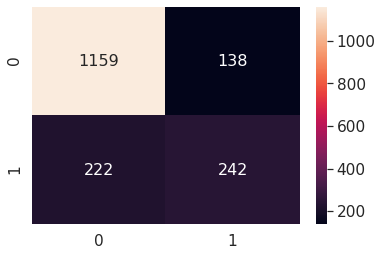

In [35]:
sn.set(font_scale=1.4)
sn.heatmap(pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, predictions)), annot=True, annot_kws={"size": 16}, fmt='')
plt.show()

In [36]:
print(sklearn.metrics.precision_score(y_test, predictions))

0.6368421052631579


In [37]:
print(sklearn.metrics.recall_score(y_test, predictions))

0.521551724137931
